#### Observed Trend1:
CBS News's tweets are the most positive ones among all the 5 medias'. For the passed 100 tweets, CBS's overall sentiment score is 0.37.

#### Observed Trend2:
For Fox's tweets, they are more positive during Christmas sesaon than other times.
    
#### Observed Trend3:
BBC's, CNN's and NYT's tweets are more neutral than CBS and Fox,because their overall sentiment score are closed to 0.

In [241]:
import pandas as pd
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np

In [242]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [243]:
# Twitter API Keys
consumer_key = "zceXcm7pek1G8ZZTmPQmGL7uS"
consumer_secret = "djqcMgQKoKTirS617FmKvC6rKzMeE34Rv3ODVfB7rk7QmyWohY"
access_token = "548324819-njxGy0Hihw2XtZmL0cyTDD5WeqPwi8OTQY3P9aZy"
access_token_secret = "9ZRSepDKzo16yNvan4zHfMuCkq3aDCC6f0I063caSQT4S"

In [244]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [245]:
# Target User
target_user = ("@BBC", "@CBS", "@CNN", "@FOXTV", "@nytimes")

In [246]:
sentiments_df = pd.DataFrame()
# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    data_list = []
    text_list = []

    # Loop through total 100 tweets
    for tweet in tweepy.Cursor(api.user_timeline, id=user).items(100):
        
        # Get text and date
        text = tweet.text
        date = tweet.created_at

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        pos = analyzer.polarity_scores(text)["pos"]
        neu = analyzer.polarity_scores(text)["neu"]
        neg = analyzer.polarity_scores(text)["neg"]

        # Add each value to the appropriate array
        compound_list.append(compound)
        positive_list.append(pos)
        neutral_list.append(neu)
        negative_list.append(neg)
        data_list.append(date)
        text_list.append(text)
        
        # Convert into DataFrame
    sentiments_df[user[1:] + '_Date'] = data_list
    sentiments_df[user[1:] + '_Tweet Text'] = text_list
    sentiments_df[user[1:] + '_Compound'] = compound_list
    sentiments_df[user[1:] + '_Positive'] = positive_list
    sentiments_df[user[1:] + '_Neutral'] = neutral_list
    sentiments_df[user[1:] + '_Negative'] = negative_list
    
sentiments_df

,BBC_Date,BBC_Tweet Text,BBC_Compound,BBC_Positive,BBC_Neutral,BBC_Negative,CBS_Date,CBS_Tweet Text,CBS_Compound,CBS_Positive,...,FOXTV_Compound,FOXTV_Positive,FOXTV_Neutral,FOXTV_Negative,nytimes_Date,nytimes_Tweet Text,nytimes_Compound,nytimes_Positive,nytimes_Neutral,nytimes_Negative
0,2018-01-17 19:33:03,Step inside the world of high-profile divorce ...,0.0000,0.000,1.000,0.000,2018-01-17 19:54:17,2018 GRAMMY® nominee @LadyGaga is never afraid...,0.0000,0.000,...,-0.1531,0.000,0.862,0.138,2018-01-17 21:16:05,Cardiologists not associated with the White Ho...,-0.0772,0.000,0.920,0.080
1,2018-01-17 19:08:42,RT @BBCWthrWatchers: Nature's very own snowbal...,0.4199,0.166,0.834,0.000,2018-01-17 19:04:12,#StrangeAngel Casting News: @rupertfriend join...,0.3182,0.119,...,0.4939,0.390,0.610,0.000,2018-01-17 21:01:21,One reader's reaction to North and South Korea...,0.4939,0.151,0.849,0.000
2,2018-01-17 19:07:51,RT @bbccomedy: Ahead of the Bayeux Tapestry's ...,0.1280,0.086,0.914,0.000,2018-01-17 14:52:00,You won't want to miss performances by @eltono...,0.1316,0.102,...,0.3400,0.179,0.821,0.000,2018-01-17 21:00:11,One reader's reaction to North and South Korea...,0.4939,0.151,0.849,0.000
3,2018-01-17 19:07:21,RT @bbcworldservice: This pair of North Korean...,0.5859,0.137,0.863,0.000,2018-01-14 22:13:29,Cast your vote now and see who will be named t...,0.9215,0.379,...,0.0000,0.000,1.000,0.000,2018-01-17 20:46:08,It’s not Apple’s fault that you feel enslaved ...,-0.1134,0.098,0.784,0.118
4,2018-01-17 19:07:07,"RT @BBCScotland: ""The more realistic they are ...",-0.4201,0.000,0.887,0.113,2018-01-14 19:12:26,"If you continue to experience problems, please...",0.3182,0.242,...,0.0000,0.000,1.000,0.000,2018-01-17 20:31:48,A fireball from a descending meteor lit up the...,0.0000,0.000,1.000,0.000
5,2018-01-17 19:00:10,👑 Lucy Worsley revisits key events in the live...,0.0000,0.000,1.000,0.000,2018-01-14 19:12:25,We apologize for the live streaming issues som...,0.1027,0.065,...,0.7384,0.438,0.562,0.000,2018-01-17 20:16:05,“No longer can we turn a blind eye or deaf ear...,-0.7351,0.000,0.772,0.228
6,2018-01-17 18:30:04,"Meet the woman who loves blood, guts &amp; gor...",0.6114,0.307,0.693,0.000,2018-01-14 19:11:33,RT @startrekcbs: There will be lots to discuss...,0.6705,0.244,...,-0.5365,0.000,0.761,0.239,2018-01-17 20:01:31,Apple plans to bring back the majority of the ...,0.0000,0.000,1.000,0.000
7,2018-01-17 17:48:46,"RT @bbcthree: ""What do you do with your junk?""...",-0.3720,0.000,0.896,0.104,2018-01-14 14:49:58,Don’t miss the AFC Divisional game! Stream the...,-0.2244,0.000,...,0.0000,0.000,1.000,0.000,2018-01-17 19:46:08,“It’s only a matter of time before loneliness ...,-0.7506,0.051,0.648,0.301
8,2018-01-17 17:30:07,These coots are putting us all to shame! #GymG...,-0.5255,0.000,0.726,0.274,2018-01-14 12:00:01,Today's music stars will be tomorrow's legends...,0.5719,0.171,...,0.0000,0.000,1.000,0.000,2018-01-17 19:31:10,"On Tuesday, a Democrat won a Wisconsin State S...",0.8176,0.283,0.717,0.000
9,2018-01-17 17:00:07,"@@@\n\nEveryone uses it, but not many know its...",0.0000,0.000,1.000,0.000,2018-01-13 14:32:07,Don’t miss the AFC Divisional game! Stream the...,-0.2244,0.000,...,-0.6505,0.000,0.797,0.203,2018-01-17 19:21:27,RT @ginakolata: Why is obesity linked to prost...,-0.6597,0.000,0.820,0.180


In [247]:
# Export the data in the DataFrame into a CSV file.
sentiments_df.to_csv("NewsMood.csv")

In [248]:
plt_df = sentiments_df[['BBC_Compound','CBS_Compound','CNN_Compound','FOXTV_Compound','nytimes_Compound']]
plt_df.head()

,BBC_Compound,CBS_Compound,CNN_Compound,FOXTV_Compound,nytimes_Compound
0,0.0000,0.0000,-0.4767,-0.1531,-0.0772
1,0.4199,0.3182,0.8402,0.4939,0.4939
2,0.1280,0.1316,0.5859,0.3400,0.4939
3,0.5859,0.9215,0.8402,0.0000,-0.1134
4,-0.4201,0.3182,0.0000,0.0000,0.0000


In [249]:
colors = ['white', 'green', 'red', 'blue', 'yellow']
BBC = plt.scatter(plt_df.index, plt_df['BBC_Compound'], marker="o", facecolors=colors[0], edgecolors="black", label='BBC')
CBS = plt.scatter(plt_df.index, plt_df['CBS_Compound'], marker="o", facecolors=colors[1], edgecolors="black", label='CBS')
CNN = plt.scatter(plt_df.index, plt_df['CNN_Compound'], marker="o", facecolors=colors[2], edgecolors="black", label='CNN')
Fox = plt.scatter(plt_df.index, plt_df['FOXTV_Compound'], marker="o", facecolors=colors[3], edgecolors="black", label='Fox')
NewYorkTimes = plt.scatter(plt_df.index, plt_df['nytimes_Compound'], marker="o", facecolors=colors[4], edgecolors="black", label='New York Times')
plt.title("Sentiment Analysis of Media Tweets (01/17/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.ylim(-1, 1)
plt.xlim(0, 100)
tick_locations = [0,20,40,60,80,100]
plt.xticks(tick_locations, ["0", "20", "40", "60", "80", "100",])
plt.legend(bbox_to_anchor=(1,1),loc=2,title='Media Sources',fontsize=10)

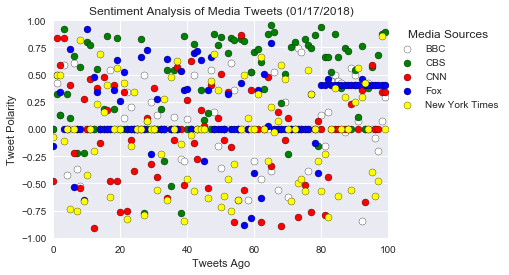

In [250]:
sns.set()
plt.show()

In [251]:
# The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization.
# For this plot, you will again aggregate the compound sentiments analyzed by VADER.

In [316]:
users = plt_df.mean().tolist()
x_axis = np.arange(len(media))
plt.bar(x_axis, media, width=1.0, color='wgrby', edgecolor = 'bk', align="edge") 

<Container object of 5 artists>

In [317]:
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "Fox", "NYT"])
plt.title("Overall Media Sentiment based on Twitter (01/17/2018)")
plt.ylabel("Tweet Polarity")
plt.ylim(-0.1, 0.4)
plt.xlim(0, len(x_axis)) 

for a,b in zip(x_axis,users):
    plt.text(a+0.4, b+0.01, str(round(b, 2)), ha='center', va= 'bottom',fontsize=10, fontweight='bold')

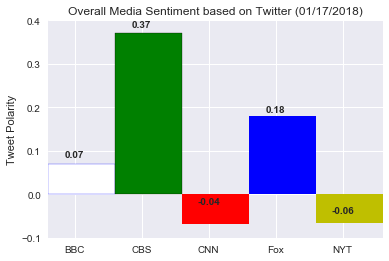

In [318]:
sns.set()
plt.show()